In [1]:
state = 'IA'
level = 'tract'
district_type = 'SH'

In [2]:
filepath = 'C:\\districting-data-2020-conn\\'
filename = state + '_' + level + '.json'

from utils import read_graph_from_json, update_attributes, get_k_L_U

G = read_graph_from_json( filepath + filename )
update_attributes(G, state)
(k, L, U) = get_k_L_U(G, state, district_type)
G.number_of_nodes()

Starting IA with k = 100 and deviation = 0.1
Thus, we have L = 30309 and U = 33498


896

In [3]:
from coarsen import graph_coarsen_by_county
(GC, partition) = graph_coarsen_by_county(G)
GC.number_of_nodes()

99

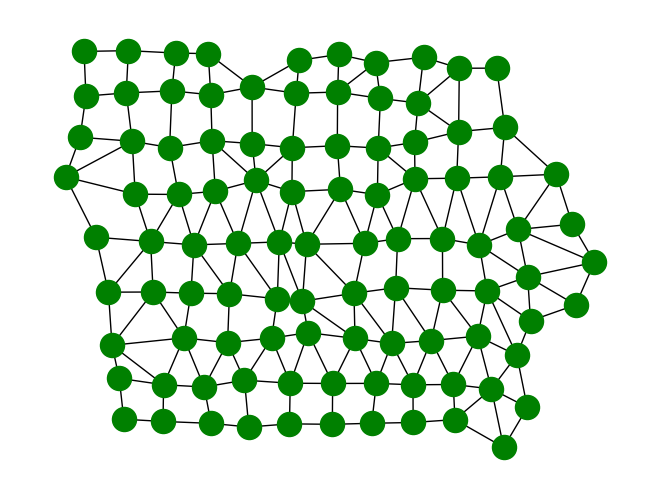

In [4]:
import networkx as nx
node_pos = { i : ( GC.nodes[i]['X'], GC.nodes[i]['Y'] ) for i in GC.nodes }
big_size = 300
nx.draw(GC, pos=node_pos, node_color='Green', node_size=big_size)

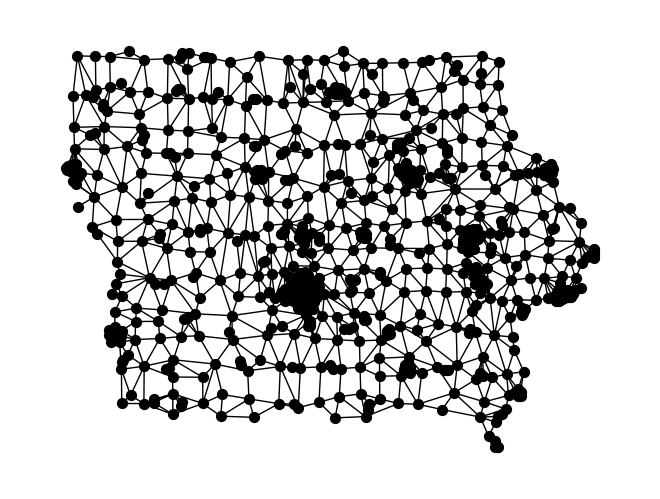

In [5]:
node_pos = { i : ( G.nodes[i]['X'], G.nodes[i]['Y'] ) for i in G.nodes }
small_size = 50
nx.draw(G, pos=node_pos, node_size=small_size, node_color='Black')

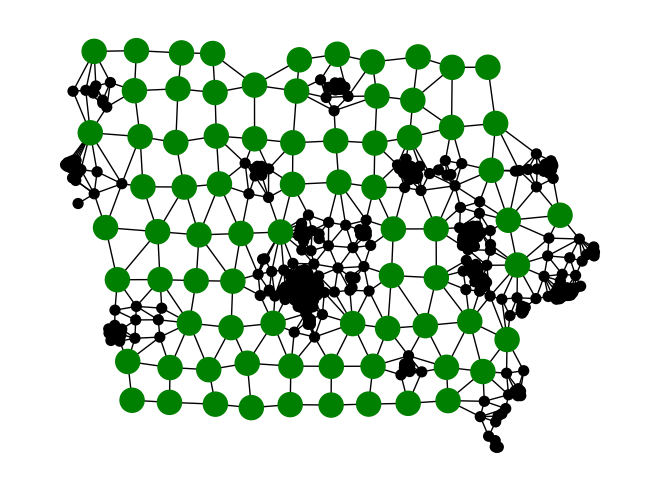

In [6]:
S = [ GC.nodes[c]['GEOID20'] for c in GC.nodes if GC.nodes[c]['TOTPOP'] > U ]
S.append('19019') # Buchanan County from the enclosed blue-curve region
(GW, partition) = graph_coarsen_by_county(G, granular_fips=S)

node_pos = { i : ( GW.nodes[i]['X'], GW.nodes[i]['Y'] ) for i in GW.nodes }
node_size = [ big_size if len(GW.nodes[i]['GEOID20'])==5 else small_size for i in GW.nodes ]
node_color = [ 'Green' if len(GW.nodes[i]['GEOID20'])==5 else 'Black' for i in GW.nodes ]
nx.draw(GW, pos=node_pos, node_size=node_size, node_color=node_color)

In [7]:
level = 'block'
filename = state + '_' + level + '.json'
GB = read_graph_from_json( filepath + filename )
update_attributes(G, state)
GB.number_of_nodes()

175199

In [8]:
from utils import import_from_baf
filepath2 = 'max-whole-plans\\'
filename = 'max_whole_counties_IA_SH_(by_Maral_Shahmizad_and_Austin_Buchanan_of_Oklahoma_State_University).baf'
plan = import_from_baf(GB, filepath2, filename)

In [9]:
from utils import induced_county_clustering
(clusters, sizes) = induced_county_clustering(GB, plan)

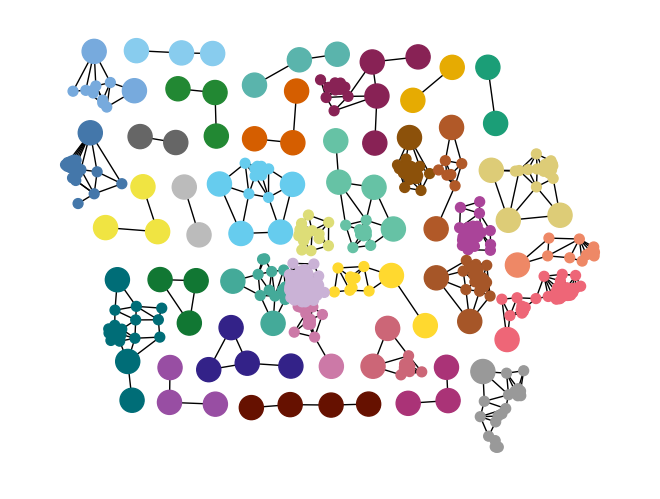

In [10]:
gtc = { v : p  for p in range(len(clusters)) for v in clusters[p] }
internal_edges = [ (u,v) for (u,v) in GW.edges if gtc[GW.nodes[u]['GEOID20'][0:5]]==gtc[GW.nodes[v]['GEOID20'][0:5]] ]
GE = GW.edge_subgraph(internal_edges)

node_pos = { i : ( GE.nodes[i]['X'], GE.nodes[i]['Y'] ) for i in GE.nodes }
node_size = [ big_size if len(GE.nodes[i]['GEOID20'])==5 else small_size for i in GE.nodes ]

components = list(nx.connected_components(GE))
vtc = { v : p for p in range(len(components)) for v in components[p] }

palette = [
    # Blues
    "#332288", "#4477AA", "#88CCEE", "#77AADD",
    # Greens
    "#117733", "#44AA99", "#66CCEE", "#228833",
    # Teals / Cyans
    "#66C2A5", "#1B9E77", "#006D77", "#5AB4AC",
    # Reds / Oranges
    "#CC6677", "#DDCC77", "#EE8866", "#EE6677", "#D55E00",
    # Purples / Magentas
    "#AA4499", "#882255", "#AA3377", "#CC79A7", "#984EA3",
    # Yellows
    "#F0E442", "#DDDD77", "#E6AB02", "#FFD92F",
    # Browns
    "#661100", "#A65628", "#8C510A", "#B15928",
    # Grays / Neutrals
    "#BBBBBB", "#999999", "#666666",
    # Extra (new 34th)
    "#CAB2D6"   # light lavender
]
node_color = [ palette[vtc[i]] for i in GE.nodes ]

nx.draw(GE, pos=node_pos, node_size=node_size, node_color=node_color)